<a href="https://colab.research.google.com/github/erkulev/erk/blob/main/%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D1%85_%D1%86%D0%B8%D1%84%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
X.shape

(1797, 64)

Понизим вместо этого количество измерений до 2, воспользовавшись методом обучения без учителя
применим алгоритм обучения на базе многообразий под названием Isomap

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

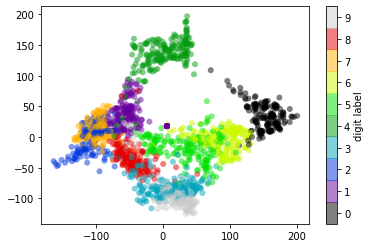

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data_projected[:, 0], data_projected[:, 1],
c=digits.target, edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);


In [14]:

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest =train_test_split(X, y, random_state=0)

Разобьем данные на обучающую и контрольную последовательности, после чего обучим на первой из них Гауссову наивную байесовскую модель

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Оценить ее точность, сравнив настоящие значения из контрольной последовательности с предсказанными

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Из одного числа сложно понять, где наша модель ошиблась. Для этой цели удобна так называемая матрица различий (confusion matrix)

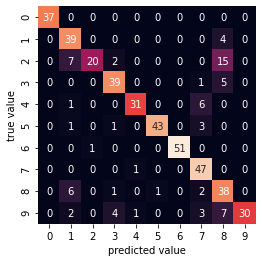

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value') # Прогнозируемое значение
plt.ylabel('true value'); # Настоящее значение

Построить график входных данных еще раз вместе с предсказанными метками

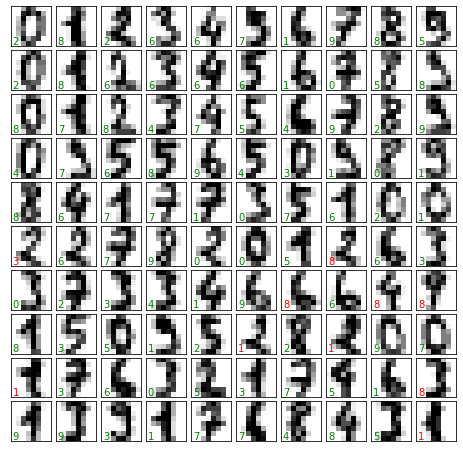

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary',interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),transform=ax.transAxes,color='green' if (ytest[i] == y_model[i]) else 'red')